# **A. Exploration Phase**

### ***1. How many observations are in the dataset? Are there null values?***



In [ ]:
import pandas as pd
sample_data_1 = pd.read_csv('202307-divvy-tripdata.csv')

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sample_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767650 entries, 0 to 767649
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             767650 non-null  object 
 1   rideable_type       767650 non-null  object 
 2   started_at          767650 non-null  object 
 3   ended_at            767650 non-null  object 
 4   start_station_name  644707 non-null  object 
 5   start_station_id    644707 non-null  object 
 6   end_station_name    637346 non-null  object 
 7   end_station_id      637346 non-null  object 
 8   start_lat           767650 non-null  float64
 9   start_lng           767650 non-null  float64
 10  end_lat             766396 non-null  float64
 11  end_lng             766396 non-null  float64
 12  member_casual       767650 non-null  object 
dtypes: float64(4), object(9)
memory usage: 76.1+ MB


In [ ]:
sample_data_1.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    122943
start_station_id      122943
end_station_name      130304
end_station_id        130304
start_lat                  0
start_lng                  0
end_lat                 1254
end_lng                 1254
member_casual              0
dtype: int64

In [ ]:
sample_data_dropped_1 = sample_data_1.dropna()
sample_data_dropped_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573958 entries, 0 to 767626
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             573958 non-null  object 
 1   rideable_type       573958 non-null  object 
 2   started_at          573958 non-null  object 
 3   ended_at            573958 non-null  object 
 4   start_station_name  573958 non-null  object 
 5   start_station_id    573958 non-null  object 
 6   end_station_name    573958 non-null  object 
 7   end_station_id      573958 non-null  object 
 8   start_lat           573958 non-null  float64
 9   start_lng           573958 non-null  float64
 10  end_lat             573958 non-null  float64
 11  end_lng             573958 non-null  float64
 12  member_casual       573958 non-null  object 
dtypes: float64(4), object(9)
memory usage: 61.3+ MB



*  original number of entries = 767,650
*  number of entries after removal of null values = 573,958
*  null entries: 767,650 - 573,958 = 193,692


 There are 767,650 observations in the dataset and a total of 193,692 entries having null values.


### ***2. How would you clean and prepare the data for analysis?***

In [ ]:
import pandas as pd
sample_data = pd.read_csv('202307-divvy-tripdata.csv')

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

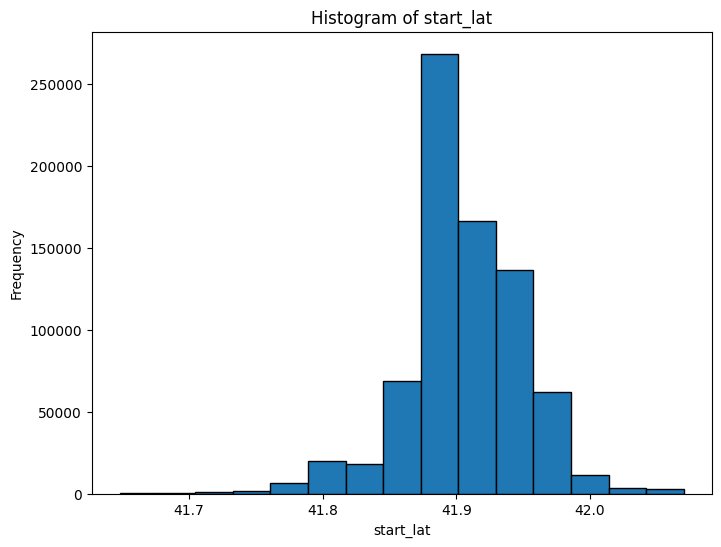

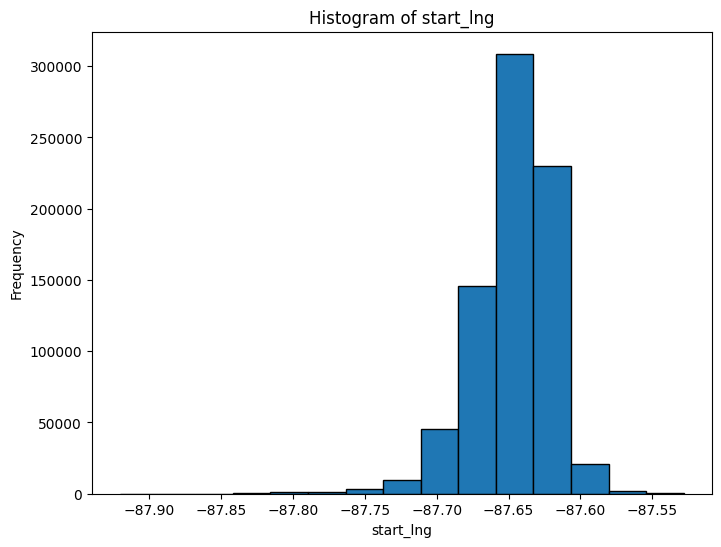

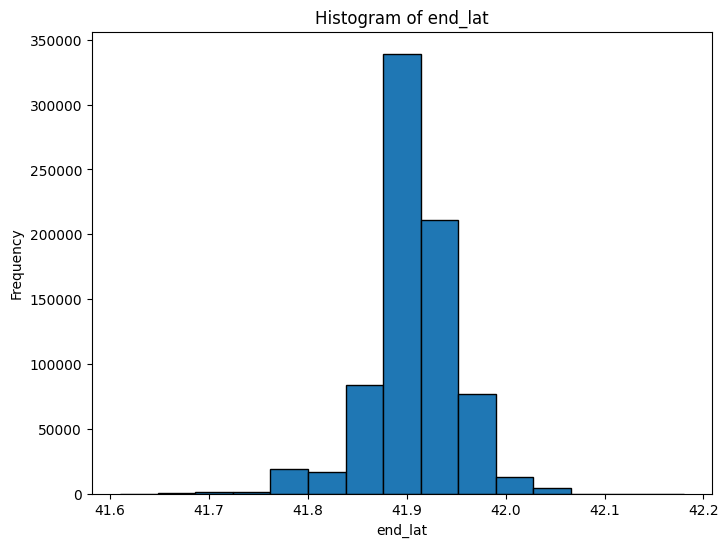

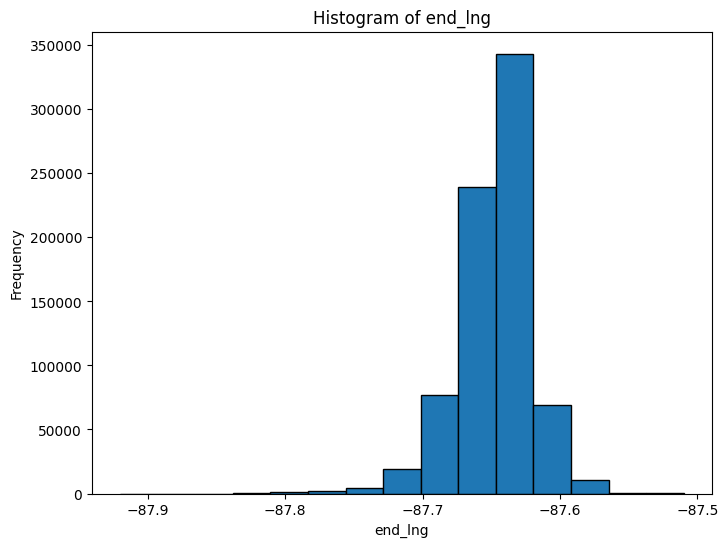

In [ ]:
columns = ["start_lat", "start_lng", "end_lat", "end_lng"]

for i in columns:
  plt.figure(figsize=(8, 6))
  plt.hist(sample_data[i], bins=15, edgecolor='k')
  plt.title(f'Histogram of {i}')
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.show()

In [ ]:
for i in columns:
  print(i)
  print("Mean: ", sample_data[i].mean())
  print("Median: ", sample_data[i].median())
  print("Mode: ", sample_data[i].mode())
  print("-----")

start_lat
Mean:  41.90564747648196
Median:  41.90108716666667
Mode:  0    41.89
Name: start_lat, dtype: float64
-----
start_lng
Mean:  -87.64641333608694
Median:  -87.64296178666666
Mode:  0   -87.65
Name: start_lng, dtype: float64
-----
end_lat
Mean:  41.90605390457368
Median:  41.902924
Mode:  0    41.89
Name: end_lat, dtype: float64
-----
end_lng
Mean:  -87.64664279326942
Median:  -87.643118
Mode:  0   -87.65
Name: end_lng, dtype: float64
-----


In [ ]:
# Replace NaN values with median
sample_data.fillna(sample_data.median, inplace = True)
# Verify NaN values
sample_data.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [ ]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767650 entries, 0 to 767649
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             767650 non-null  object 
 1   rideable_type       767650 non-null  object 
 2   started_at          767650 non-null  object 
 3   ended_at            767650 non-null  object 
 4   start_station_name  767650 non-null  object 
 5   start_station_id    767650 non-null  object 
 6   end_station_name    767650 non-null  object 
 7   end_station_id      767650 non-null  object 
 8   start_lat           767650 non-null  float64
 9   start_lng           767650 non-null  float64
 10  end_lat             767650 non-null  object 
 11  end_lng             767650 non-null  object 
 12  member_casual       767650 non-null  object 
dtypes: float64(2), object(11)
memory usage: 76.1+ MB


Due to some skewness in the data, the group made use of the median to replace the null values.

### ***3. Which bike types are popular and which ones aren't? Check if being a member or casual rider makes a difference in bike choice.***

In [ ]:
sample_data.select_dtypes("object").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767650 entries, 0 to 767649
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ride_id             767650 non-null  object
 1   rideable_type       767650 non-null  object
 2   started_at          767650 non-null  object
 3   ended_at            767650 non-null  object
 4   start_station_name  767650 non-null  object
 5   start_station_id    767650 non-null  object
 6   end_station_name    767650 non-null  object
 7   end_station_id      767650 non-null  object
 8   end_lat             767650 non-null  object
 9   end_lng             767650 non-null  object
 10  member_casual       767650 non-null  object
dtypes: object(11)
memory usage: 64.4+ MB


In [ ]:
# Checks the top bike type
sample_data["rideable_type"].describe()

count            767650
unique                3
top       electric_bike
freq             387096
Name: rideable_type, dtype: object

In [ ]:
# Verifies the number of bike usage
print(sample_data["rideable_type"].value_counts())

electric_bike    387096
classic_bike     362130
docked_bike       18424
Name: rideable_type, dtype: int64


The most popular bike type is the electric bike, while the least popular bike type is the docked bike.

In [ ]:
# Compares number of member and casual riders for each bike
print(sample_data.value_counts((["rideable_type", "member_casual"])))

rideable_type  member_casual
classic_bike   member           219248
electric_bike  member           217044
               casual           170052
classic_bike   casual           142882
docked_bike    casual            18424
dtype: int64


From the given data, the number of members is greater than the number of casual riders who choose classic and electric bikes. Likewise, none of the members choose docked bikes while there are casual riders who choose docked bikes.

###***4. Time Check! What are the peak and off-peak riding times during the day?***

In [ ]:
# Converts object to datetime datatype
sample_data['started_at'] = pd.to_datetime(sample_data['started_at'])

# Extracts day of week and hour
sample_data['day'] = sample_data['started_at'].dt.day_name()
sample_data['hour'] = sample_data['started_at'].dt.hour

# Group by hour and calculate the sum of bikes for each hour
rides_hour = sample_data.groupby('hour')['started_at'].count()

# Find most rides per hour
most_rides_hour = sample_data['hour'].mode().values[0]

# Group by hour and find the timestamp with the most bike rides within that hour
most_rides_timestamp = sample_data.loc[sample_data.groupby('hour')['started_at'].value_counts()]

print(most_rides_timestamp['started_at'])

4   2023-07-08 15:46:42
3   2023-07-21 08:27:44
3   2023-07-21 08:27:44
3   2023-07-21 08:27:44
3   2023-07-21 08:27:44
            ...        
1   2023-07-23 17:05:07
1   2023-07-23 17:05:07
1   2023-07-23 17:05:07
1   2023-07-23 17:05:07
1   2023-07-23 17:05:07
Name: started_at, Length: 617777, dtype: datetime64[ns]


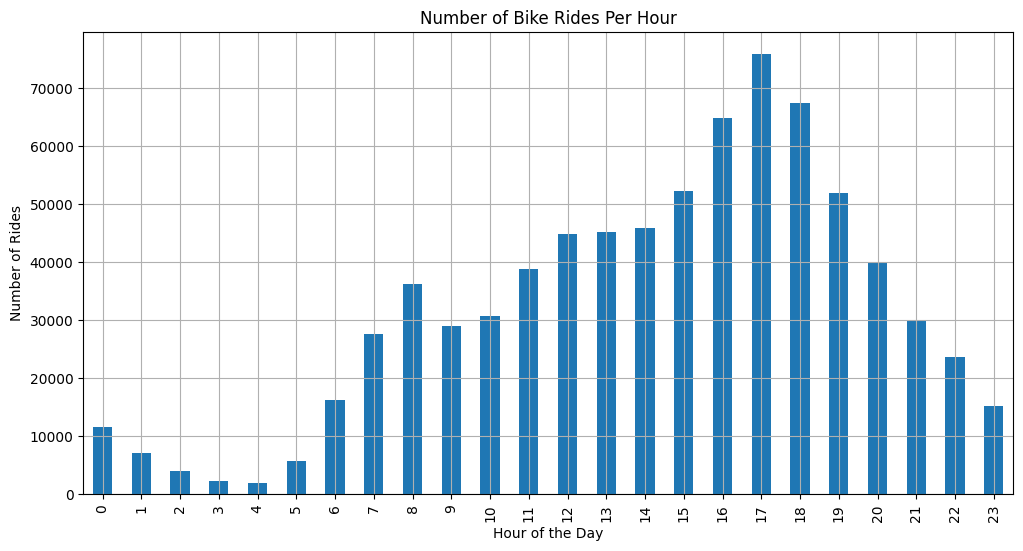

In [ ]:
# visualize
plt.figure(figsize=(12, 6))
rides_hour.plot(kind='bar')
plt.title('Number of Bike Rides Per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

1.   Peak riding time:
      *   5:00 PM


2.   Off-peak riding time:
      *   4:00 AM

# **B. Visualization**

### ***1. Bar chart: Display the number of times each bike type is used to identify the most and least used bikes.***

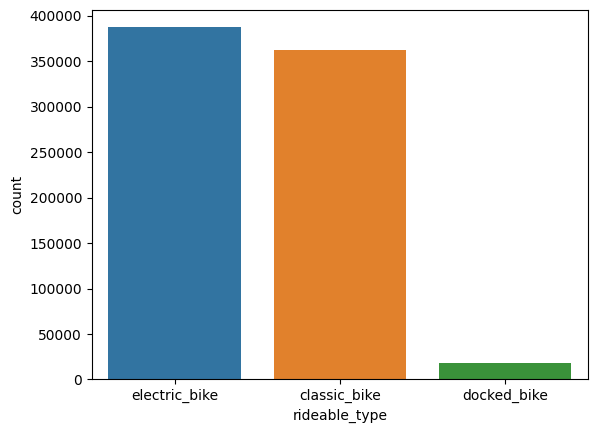

In [ ]:
sns.countplot(data = sample_data, x = "rideable_type")

plt.show()


The most used bike is the classic bike, while the least used is the docked bike.

### ***2. Grouped bar chart: Compare bike usage by member type (member vs. casual) to see if it affects bike choice.***

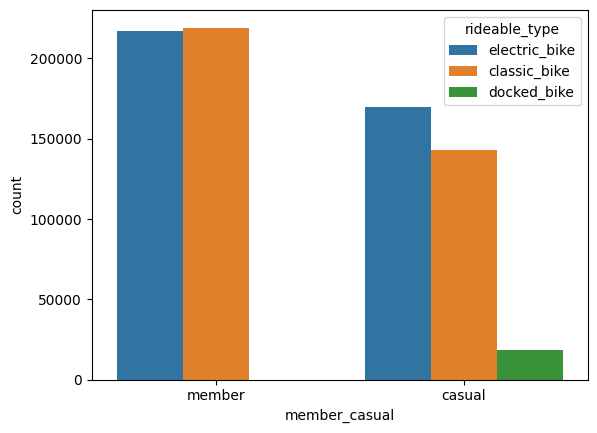

In [ ]:
sns.countplot(data=sample_data, x="member_casual", hue="rideable_type")

plt.show()

The graphs shows that "member" has a higher overall usage for classic_bike and electric_bike while classic_bike is slightly higher than electric_bike. As for "casual" electric_bike has a noticable higher usage as compared to classic_bike and docked_bike.

### ***3. Heatmap: Vividly illustrate the popularity of bikes at different times during the day and week***

In [ ]:
new_sample_data_dropped = sample_data.copy(deep=True)

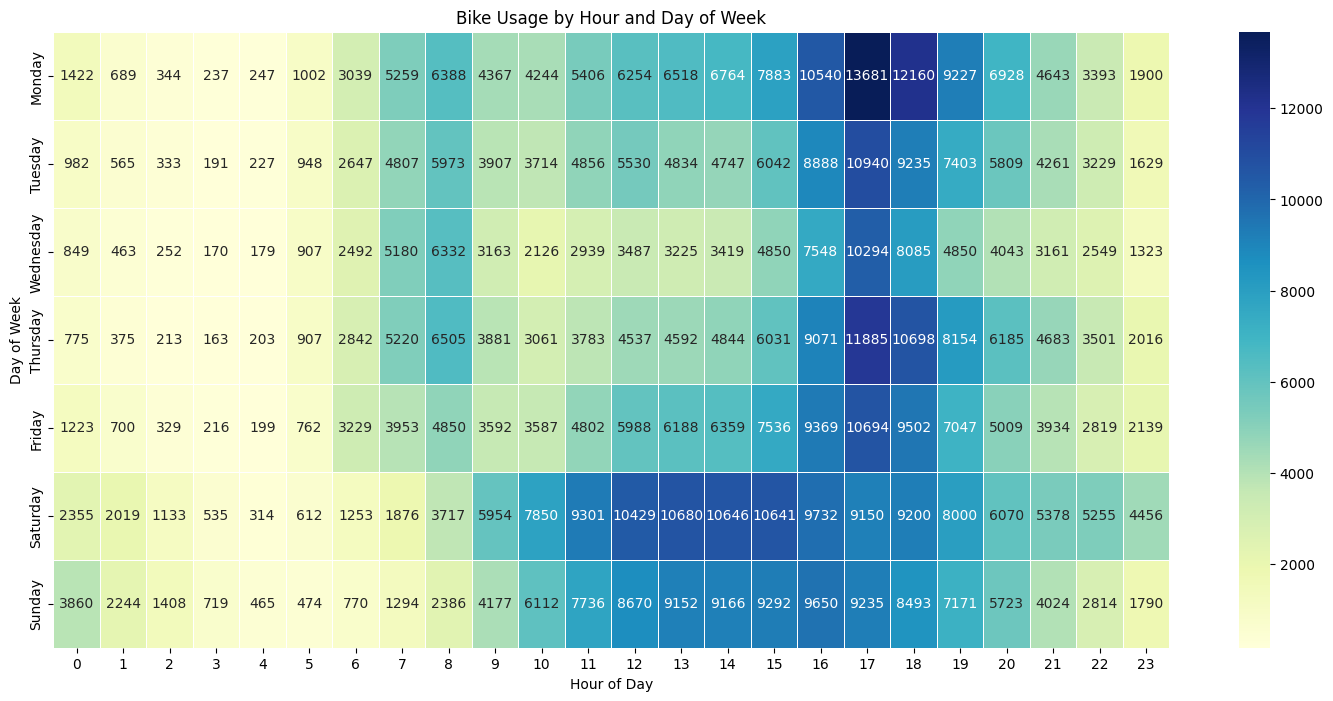

In [ ]:
# Converts object to datetime datatype
new_sample_data_dropped['started_at'] = pd.to_datetime(new_sample_data_dropped['started_at'])

# Extracts day of week and hour
new_sample_data_dropped['day'] = new_sample_data_dropped['started_at'].dt.day_name()
new_sample_data_dropped['hour'] = new_sample_data_dropped['started_at'].dt.hour

# Count rides by day and hour
# reshape and agg data
pivot_table = new_sample_data_dropped.pivot_table(index='day', columns='hour', aggfunc='size')

# Reorder days
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot_table = pivot_table.reindex(ordered_days)

# Heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=.5, annot=True, fmt="d")

plt.title('Bike Usage by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

plt.show()

The popularity of bikes appears to be highest during these times:

*   Weekdays during rush hours
  * Mondays to Fridays
  * Around 8:00 AM
  * 4:00 PM - 6:00 PM
*   Saturday afternoons
  * 12:00 PM - 3:00 PM

On the other hand, there is a significant reduction during these times:

*   Early morning hours
  * 12:00 AM - 5:00 AM

### ***Additional Visualization***

In [ ]:
pip install descartes    # done installing library

In [ ]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

<Axes: >

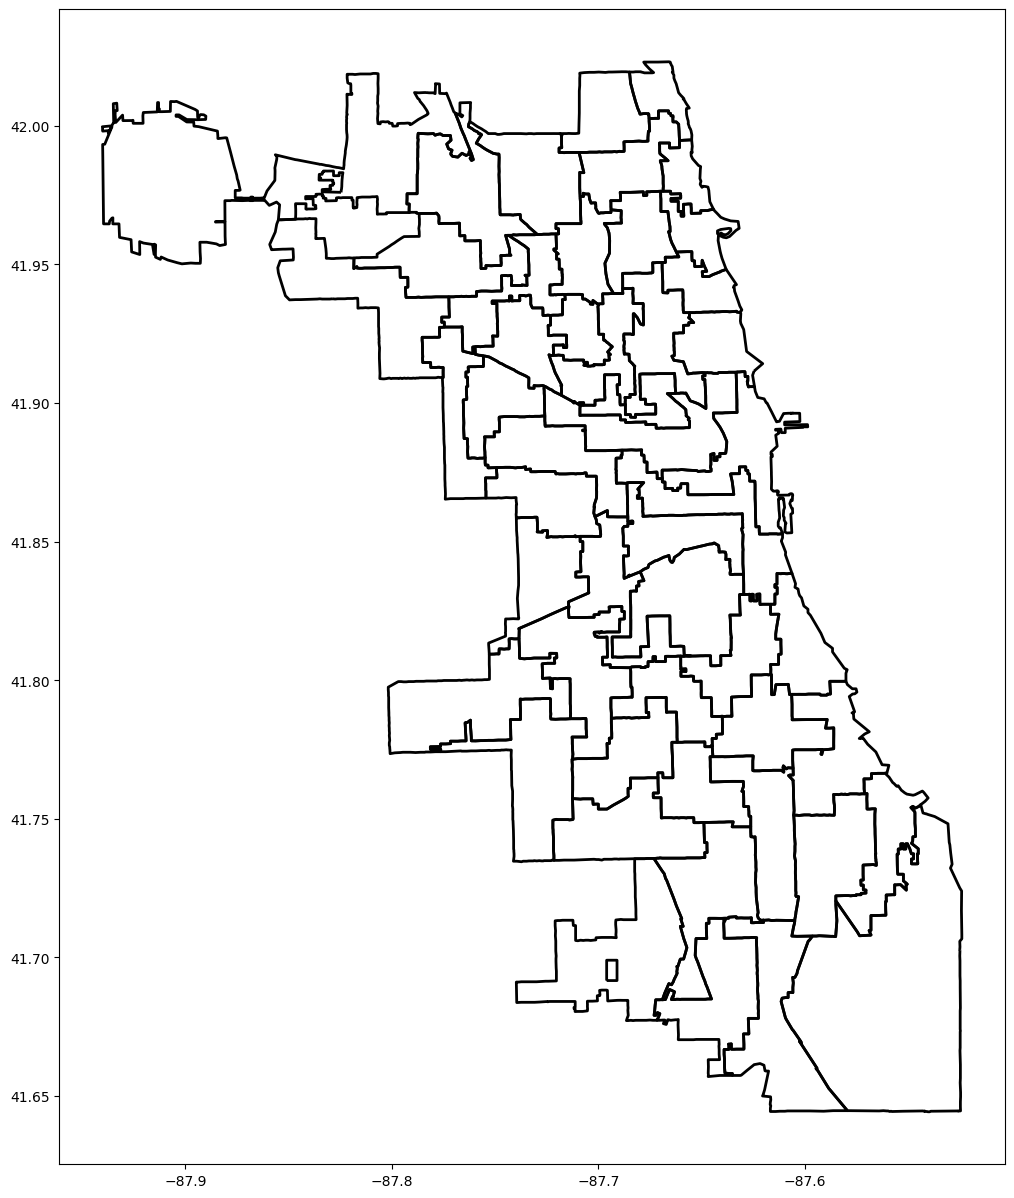

In [ ]:
street_map = gpd.read_file('ward1998.shp')
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, color='none', edgecolor='black', linewidth=2)

In [ ]:
new_df = sample_data.copy(deep=True)
geometry = [Point(xy) for xy in zip(new_df['start_lng'], new_df['start_lat'])]

In [ ]:
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(new_df, #specify data
                          crs=crs, #specify coordinate reference system
                          geometry=geometry) #specify the geometry list created
geo_df.head()

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day,hour,geometry
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member,Sunday,20,POINT (-87.70091 41.69241)
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member,Sunday,17,POINT (-87.68660 41.89842)
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member,Sunday,10,POINT (-87.68660 41.89842)
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.64119,member,Friday,8,POINT (-87.65694 41.88411)
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member,Saturday,15,POINT (-87.66729 41.96709)


<Axes: >

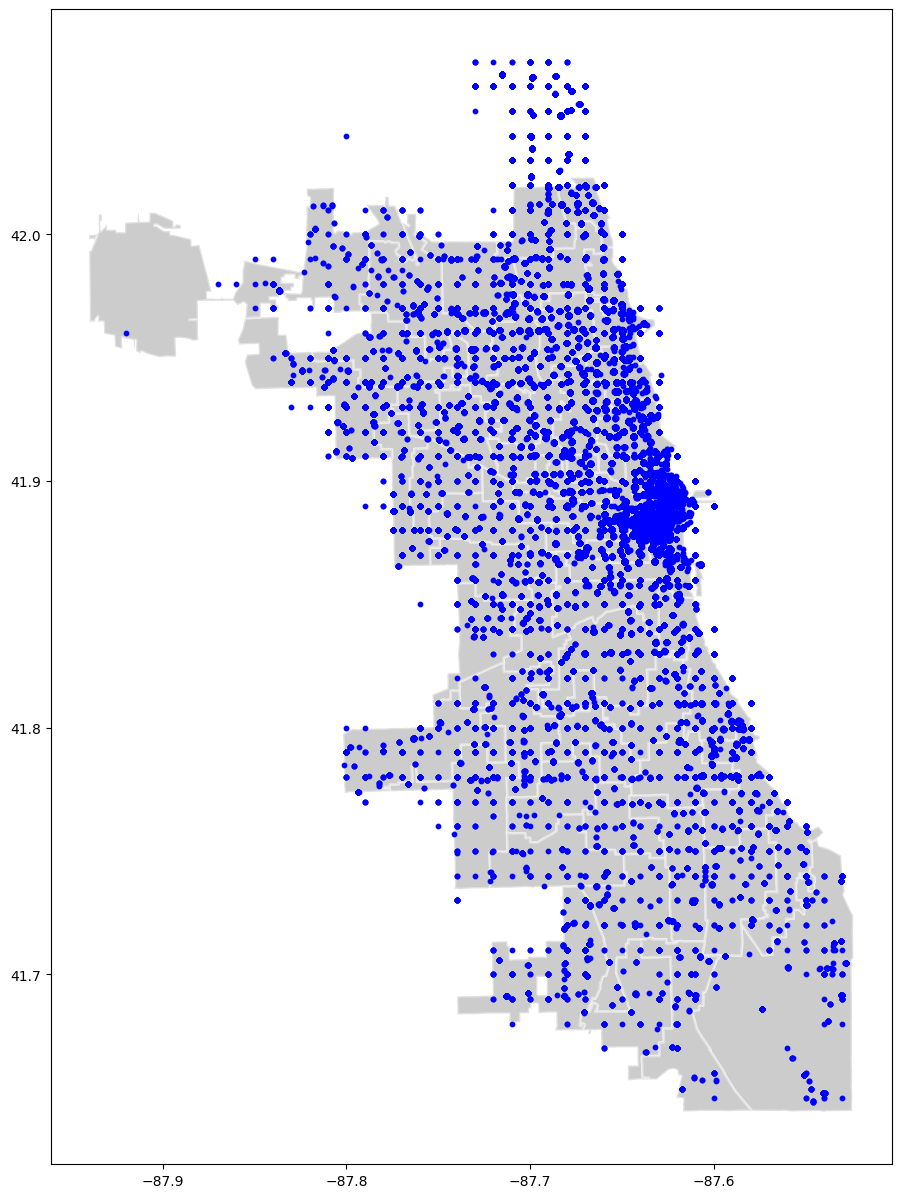

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey', edgecolor='white', linewidth=2)
geo_df.plot(ax=ax, markersize=10, color='blue', marker='o')

In [ ]:
popular_spots = geo_df.groupby(['start_lat', 'start_lng']).size().reset_index(name='count')
popular_spots = popular_spots.sort_values(by='count', ascending=False)

print("Top Popular Spots:")
print(popular_spots.head(10))

Top Popular Spots:
        start_lat  start_lng  count
100928  41.892278 -87.612043   8988
151851  41.911722 -87.626804   5377
52874   41.880958 -87.616743   5337
182942  41.926277 -87.630834   4578
128315  41.900960 -87.623777   4514
147001  41.910000 -87.630000   3956
133814  41.902973 -87.631280   3185
90401   41.890000 -87.630000   3153
53701   41.881032 -87.624084   3056
160210  41.915689 -87.634600   2812


# **Data Treatment/Technique**


1.   Exploratory Data Analysis
      * Descriptive Statistics
      * Visualizations
2.   Data Cleaning
      * Handling Missing Values
3.   Data Transformation
      * Datetime Conversion
4.   Feature Engineering
      * Creating New Columns



# **Mitigation/Proposed Solution**

1.   Offer loyalty/membership cards for casual riders who use docked bikes.
2.   Increase stocks of classic bikes for members.
3. Offer discounts on certain bike types for frequent users, regardless of membership
4. Offer promos/discounts to increase rentals during off-peak hours and increase rates during peak hours.

